In [ ]:
problems:
1-mixed format
2-batchNorm,loss
3-No.steps

# Import Library

In [60]:
#import cv2,os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import keras
from keras_sequential_ascii import keras2ascii
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.applications import MobileNetV2,mobilenet_v2
import visualkeras
import matplotlib.image as mpimg
from matplotlib import image
from PIL import Image , ImageFont


from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import layers
from keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Dropout, Flatten,InputLayer

#import plotly.graph_objects as go
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow .keras.preprocessing.image import img_to_array,load_img

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.layers import Input, ZeroPadding2D, Dropout,AveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score,f1_score, confusion_matrix
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16 
from keras.applications.vgg19 import VGG19 

from tensorflow.keras.applications import VGG16 ,Xception ,ResNet50 ,MobileNet ,DenseNet121 ,EfficientNetB1

# Read the dataset 

In [2]:
SEED=123
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [3]:
# Read all accident images that in training set
list_images_accident = []
name_accident= []
for dirname, _, filenames in os.walk('./data/train/Accident'):
    for filename in filenames:
        list_images_accident.append(os.path.join(dirname, filename))
        name_accident.append(filename)
list_images_accident

['./data/train/Accident\\acc1 (1).jpg',
 './data/train/Accident\\acc1 (13).jpg',
 './data/train/Accident\\acc1 (14).jpg',
 './data/train/Accident\\acc1 (15).jpg',
 './data/train/Accident\\acc1 (2).jpg',
 './data/train/Accident\\acc1 (3).jpg',
 './data/train/Accident\\acc1 (5).jpg',
 './data/train/Accident\\accident_0_1.jpg',
 './data/train/Accident\\accident_0_10.jpg',
 './data/train/Accident\\accident_0_100.jpg',
 './data/train/Accident\\accident_0_1000.jpg',
 './data/train/Accident\\accident_0_1001.jpg',
 './data/train/Accident\\accident_0_1002.jpg',
 './data/train/Accident\\accident_0_1003.jpg',
 './data/train/Accident\\accident_0_1008.jpg',
 './data/train/Accident\\accident_0_101.jpg',
 './data/train/Accident\\accident_0_1011.jpg',
 './data/train/Accident\\accident_0_1012.jpg',
 './data/train/Accident\\accident_0_1015.jpg',
 './data/train/Accident\\accident_0_1016.jpg',
 './data/train/Accident\\accident_0_1017.jpg',
 './data/train/Accident\\accident_0_1019.jpg',
 './data/train/Acci

# Pickle.dump() Method In Python
### Method Signature:
##### pickle.dump(pythonObject, pickleDestination, pickle_protocol=None, *, fix_imports=True)
* The dump() method of the pickle module in Python, converts a Python object hierarchy into a byte stream.This process is also called as serilaization.
* The converted byte stream can be written to a buffer or to a disk file.
* The byte stream of a pickled Python object can converted back to a Python object using the pickle.load() method.

In [4]:
open_file = open("list_images_accident.txt", "wb")
pickle.dump(list_images_accident, open_file)
open_file.close()

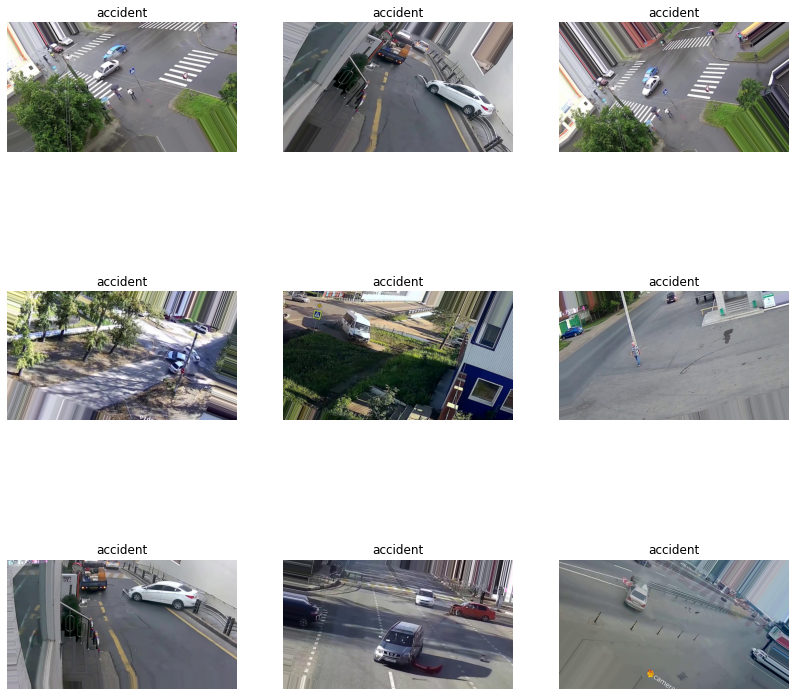

In [5]:
with open("list_images_accident.txt", "rb") as fp:
    accident = pickle.load(fp)
plt.figure(figsize=(14, 14))
ran_num = []
for i in range(0,9):
    n = random.randint(0,len(accident))
    ran_num.append(n)
for i in range(9):
    ax= plt.subplot(3, 3, i + 1)
    plt.imshow(mpimg.imread(accident[ran_num[i]]))
    plt.title("accident")
    plt.axis("off")

In [6]:
df_images_accident = pd.DataFrame()
df_images_accident["File_Name"] = name_accident
df_images_accident["Class"] = "accident"
df_images_accident

,File_Name,Class
0,acc1 (1).jpg,accident
1,acc1 (13).jpg,accident
2,acc1 (14).jpg,accident
3,acc1 (15).jpg,accident
4,acc1 (2).jpg,accident
...,...,...
6714,test_39.jpg,accident
6715,test_40.jpg,accident
6716,test_42.jpg,accident
6717,test_43.jpg,accident


In [7]:
# Read all accident images that in training set
list_images_no_accident = []
name_no_accident= []
for dirname_2, _, filenames_2 in os.walk('./data/train/Non Accident'):
    for filename in filenames_2:
        list_images_no_accident.append(os.path.join(dirname_2, filename))
        name_no_accident.append(filename)
list_images_no_accident

['./data/train/Non Accident\\5_10.jpg',
 './data/train/Non Accident\\5_11.jpg',
 './data/train/Non Accident\\5_12.jpg',
 './data/train/Non Accident\\5_13.jpg',
 './data/train/Non Accident\\5_14.jpg',
 './data/train/Non Accident\\5_15.jpg',
 './data/train/Non Accident\\5_17.jpg',
 './data/train/Non Accident\\5_24.jpg',
 './data/train/Non Accident\\5_25.jpg',
 './data/train/Non Accident\\5_27.jpg',
 './data/train/Non Accident\\5_28.jpg',
 './data/train/Non Accident\\5_29.jpg',
 './data/train/Non Accident\\5_30.jpg',
 './data/train/Non Accident\\5_5.jpg',
 './data/train/Non Accident\\5_6.jpg',
 './data/train/Non Accident\\5_7.jpg',
 './data/train/Non Accident\\5_8.jpg',
 './data/train/Non Accident\\5_9.jpg',
 './data/train/Non Accident\\non accident_0_10.jpg',
 './data/train/Non Accident\\non accident_0_100.jpg',
 './data/train/Non Accident\\non accident_0_1000.jpg',
 './data/train/Non Accident\\non accident_0_1002.jpg',
 './data/train/Non Accident\\non accident_0_1003.jpg',
 './data/trai

In [8]:
open_file = open("list_images_no_accident.txt", "wb")
pickle.dump(list_images_no_accident, open_file)
open_file.close()

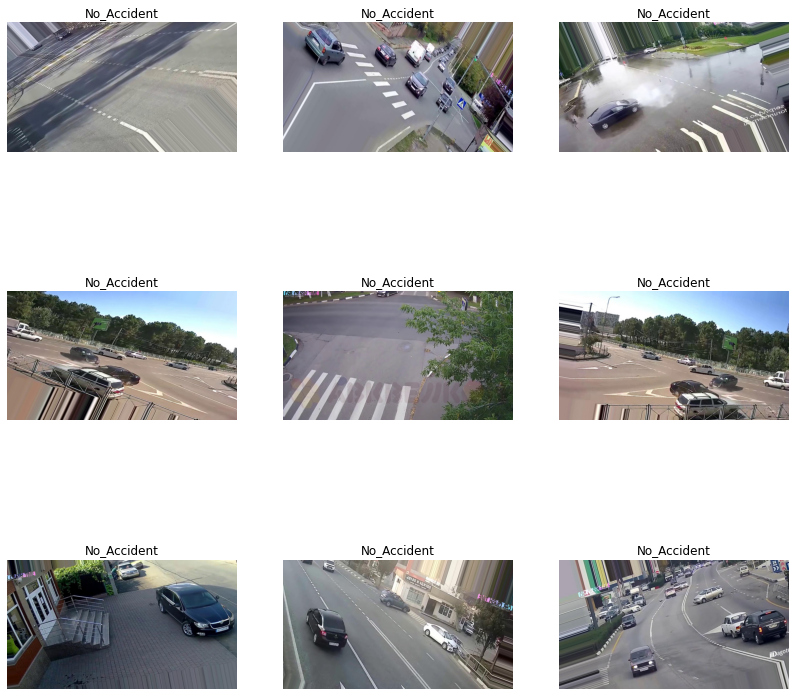

In [9]:
with open("list_images_no_accident.txt", "rb") as fp: 
    no_accident = pickle.load(fp)
plt.figure(figsize=(14, 14))
ran_num = []
for i in range(0,9):
    n = random.randint(0,len(no_accident))
    ran_num.append(n)
for i in range(9):
    ax= plt.subplot(3, 3, i + 1)
    plt.imshow(mpimg.imread(no_accident[ran_num[i]]))
    plt.title("No_Accident")
    plt.axis("off")

In [10]:
df_images_no_accident = pd.DataFrame()
df_images_no_accident["File_Name"] = name_no_accident
df_images_no_accident["Class"] = "No_Accident"
df_images_no_accident

,File_Name,Class
0,5_10.jpg,No_Accident
1,5_11.jpg,No_Accident
2,5_12.jpg,No_Accident
3,5_13.jpg,No_Accident
4,5_14.jpg,No_Accident
...,...,...
7246,test_5.jpg,No_Accident
7247,test_6.jpg,No_Accident
7248,test_7.jpg,No_Accident
7249,test_8.jpg,No_Accident


In [11]:
df_all_images = pd.concat([df_images_accident, df_images_no_accident], ignore_index=True)
df_all_images

,File_Name,Class
0,acc1 (1).jpg,accident
1,acc1 (13).jpg,accident
2,acc1 (14).jpg,accident
3,acc1 (15).jpg,accident
4,acc1 (2).jpg,accident
...,...,...
13965,test_5.jpg,No_Accident
13966,test_6.jpg,No_Accident
13967,test_7.jpg,No_Accident
13968,test_8.jpg,No_Accident


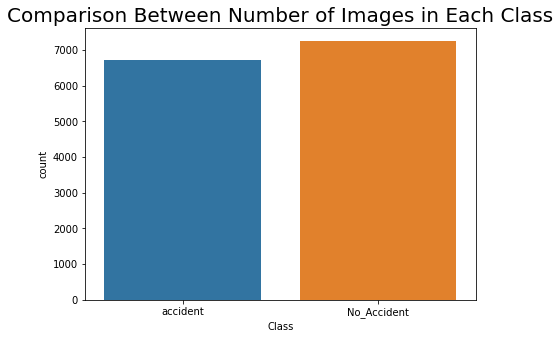

In [12]:
plt.figure(figsize=(7,5))
sns.countplot(x = "Class", data = df_all_images)
plt.title('Comparison Between Number of Images in Each Class',fontdict={'fontsize':20});

# Prepare Images for Modeling

In [ ]:
def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(150,150))
    x = image.img_to_array(img)
    return x

In [ ]:
?matplotlib

In [ ]:
images = []
labels = []

directory = os.fsencode('./data/train')

for folder in os.listdir(directory):
    label = os.fsdecode(folder)
    for img in os.listdir(f'./data/train/{label}'):
        img_name = os.fsdecode(img)
        images.append(prepare_image(f'./data/train/{label}/{img_name}'))
        labels.append(label)

In [ ]:
label_0_1 = [int(labels[w].replace('Non Accident', "0").replace("Accident",'1')) for w in range(len(labels))]
label_0_1

In [ ]:
len(label_0_1)

In [ ]:
X, Y = images, label_0_1

In [ ]:
X = np.array(X)
Y = np.array(Y)

In [ ]:
open_file = open("X_150x150.txt", "wb")#.h5
pickle.dump(X, open_file)
open_file.close()

In [ ]:
open_file = open("Y_150x150.txt", "wb")
pickle.dump(Y, open_file)
open_file.close()

In [13]:
with open("X_150x150.txt", "rb") as fp: 
    x = pickle.load(fp)

In [14]:
with open("Y_150x150.txt", "rb") as fp: 
    y= pickle.load(fp)

# Increase the TrainSet Bu Using Data Augmentation 

In [ ]:
datagen = ImageDataGenerator(
    rotation_range = 40, 
    width_shift_range = 0.1,
    height_shift_range = 0.1, 
    brightness_range = (0.5, 1),
    shear_range=0.2,
    zoom_range = 0.2,
    horizontal_flip = True, 
    fill_mode='nearest')

In [ ]:
sample_df = df_images_accident.sample(1)

sample_generator = datagen.flow_from_dataframe(
    dataframe = sample_df,
    directory = './data/train/Accident',
    x_col = "File_Name",
    y_col = "Class")

plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    for X, y in sample_generator:
        plt.imshow(X[0]/255)
        plt.axis("off")
        break
plt.tight_layout()
plt.show()

In [ ]:
Sample_list_images_no_accident = random.sample(list_images_no_accident, 422)
Sample_list_images_accident = random.sample(list_images_accident, 369)

In [ ]:
for path in Sample_list_images_accident:
    img = load_img(path)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    i = 0
    for batch in datagen.flow(x, batch_size=1,save_to_dir='./data/train/Accident', save_prefix='accident', save_format='jpg'):
        i += 1
        if i > 5:
            break
            
for path in Sample_list_images_no_accident:
    img = load_img(path)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    i = 0
    for batch in datagen.flow(x, batch_size=1,save_to_dir='./data/train/Non Accident', save_prefix='non accident', save_format='jpg'):
        i += 1
        if i > 5:
            break

In [ ]:
list_images_accident_Aug = []
name_accident_Aug= []
for dirname, _, filenames in os.walk('./data/train/Accident'):
    for filename in filenames:
        list_images_accident_Aug.append(os.path.join(dirname, filename))
        name_accident_Aug.append(filename)

list_images_accident_Aug = pd.DataFrame()
list_images_accident_Aug["File_Name"] = name_accident_Aug
list_images_accident_Aug["Class"] = "Accident"
list_images_accident_Aug

In [ ]:
list_images_no_accident_Aug = []
name_no_accident_Aug= []
for dirname, _, filenames in os.walk('./data/train/Non Accident'):
    for filename in filenames:
        list_images_no_accident_Aug.append(os.path.join(dirname, filename))
        name_no_accident_Aug.append(filename)

list_images_no_accident_Aug = pd.DataFrame()
list_images_no_accident_Aug["File_Name"] = name_no_accident_Aug
list_images_no_accident_Aug["Class"] = "Non Accident"
list_images_no_accident_Aug

In [ ]:
df_all_images_Aug = pd.concat([list_images_accident_Aug, list_images_no_accident_Aug], ignore_index=True)
df_all_images_Aug

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x = "Class", data = df_all_images_Aug)
plt.title('Comparison Between Number of Images in Each Class',fontdict={'fontsize':20});

In [ ]:
## Generated Validation Augmen
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator =  train_datagen.flow_from_directory(
    './data/train',
    seed=42,
    target_size= (img_height, img_width),
    batch_size=batch_size, class_mode='categorical')

# Model fitting (augmented) and Accuracy/Loss Evaluation

In [15]:
## Defining batch specfications
batch_size = 100
img_height = 150
img_width = 150

In [16]:
# ## Generated Validation Augmen
# train_datagen = ImageDataGenerator(rescale=1./255)
# train_generator =  train_datagen.flow_from_directory(
#     './data/train',
#     seed=42,
#     target_size= (img_height, img_width),
#     batch_size=batch_size, class_mode='binary')

In [45]:
## Generated Validation Augmen
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator =  val_datagen.flow_from_directory(
    './data/val',
    seed=42,
    target_size= (img_height, img_width),
    batch_size=batch_size, class_mode='binary')

Found 98 images belonging to 2 classes.


In [18]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    './data/test',
    seed=42,
    target_size= (img_height, img_width),
    batch_size=batch_size, class_mode='binary')

Found 100 images belonging to 2 classes.


In [46]:
# Create the data sets
x_train, y_train = x,y
x_val, y_val = next(val_generator)
x_test, y_test = next(test_generator)

In [20]:
y_train_cat = to_categorical(y_train)

In [21]:
y_train_cat.shape

(13970, 2)

In [22]:
y_train.shape

(13970,)

In [23]:
x_train.shape

(13970, 150, 150, 3)

In [24]:
# Checking the shapes of the datasets
m_train = x_train.shape[0]
num_px = x_train.shape[1]
m_val = x_val.shape[0]
m_test = x_test.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of validation samples: " + str(m_val))
print ("Number of testing samples: " + str(m_test))
print ("train_images shape: " + str(x_train.shape))
print ("train_labels shape: " + str(y_train.shape))
print ("val_images shape: " + str(x_val.shape))
print ("val_labels shape: " + str(y_val.shape))
print ("test_images shape: " + str(x_test.shape))
print ("test_labels shape: " + str(y_test.shape))

Number of training samples: 13970
Number of validation samples: 98
Number of testing samples: 100
train_images shape: (13970, 150, 150, 3)
train_labels shape: (13970,)
val_images shape: (98, 150, 150, 3)
val_labels shape: (98,)
test_images shape: (100, 150, 150, 3)
test_labels shape: (100,)


# Experiment0: Build Simple Neural Network Model - NN

In [ ]:
NN_1= tf.keras.models.Sequential([InputLayer(input_shape=x_train.shape[1:]),
                         Flatten(),
                         Dense(40, activation='relu'),
                         Dense(1, activation='sigmoid')])

NN_1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
NN_1.summary()

In [ ]:
keras2ascii(NN_1)

In [ ]:
NN_1.fit(x_train, y_train, epochs=5,validation_data=(x_val,y_val),batch_size=32)
predict_x = NN_1.predict(x_val)
classes_x = np.argmax(predict_x, axis=1)
predict_r = NN_1.predict(x_train)
classes_r = np.argmax(predict_r, axis=1)
print(f"Training: {accuracy_score(y_train, classes_r)}")
print(f"Valid: {accuracy_score(y_val, classes_x)}")

In [ ]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(NN_1, legend=True, font=font)

In [ ]:
NN_2_1 = Sequential([InputLayer(input_shape=x_train.shape[1:]),
                         Flatten(),
                         Dense(500, activation='relu'),
                         Dense(1, activation='sigmoid')])

NN_2_1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

NN_2_1_model = NN_2_1.fit(x_train, y_train, epochs=5,validation_data=(x_val,y_val),batch_size=32)

predict_x = NN_2_1.predict(x_val)
classes_x = np.argmax(predict_x, axis=1)
predict_r = NN_2_1.predict(x_train)
classes_r = np.argmax(predict_r, axis=1)
print(f"Training: {accuracy_score(y_train, classes_r)}")
print(f"Vali: {accuracy_score(y_val, classes_x)}")

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(NN_2_1, legend=True, font=font)

In [ ]:
keras2ascii(NN_2_1)

In [ ]:
NN_2_2 = Sequential([InputLayer(input_shape=x_train.shape[1:]),
                         Flatten(),
                         Dense(1500, activation='relu'),
                         Dense(1, activation='sigmoid')])

NN_2_2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

NN_2_2_model = NN_2_2.fit(x_train, y_train, epochs=5,validation_data=(x_val,y_val),batch_size=32)

predict_x = NN_2_2.predict(x_val)
classes_x = np.argmax(predict_x, axis=1)
predict_r = NN_2_2.predict(x_train)
classes_r = np.argmax(predict_r, axis=1)
print(f"Training: {accuracy_score(y_train, classes_r)}")
print(f"Vali: {accuracy_score(y_val, classes_x)}")

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(NN_2_2, legend=True, font=font)

In [ ]:
keras2ascii(NN_2_2)

# Try adding more layers to NN

In [ ]:
NN_3 = Sequential([InputLayer(input_shape=x_train.shape[1:]),
                         Flatten(),
                         Dense(500, activation='relu'),
                         Dense(250, activation='relu'),
                         Dense(125, activation='relu'),
                         Dense(75, activation='relu'),
                         Dense(1, activation='sigmoid')])

NN_3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
NN_3_model =  NN_3.fit(x_train, y_train, epochs=5,validation_data=(x_val,y_val),batch_size=32)

predict_x = NN_3.predict(x_val)
classes_x = np.argmax(predict_x, axis=1)
predict_r = NN_3.predict(x_train)
classes_r = np.argmax(predict_r, axis=1)
print(f"Training: {accuracy_score(y_train, classes_r)}")
print(f"Vali: {accuracy_score(y_val, classes_x)}")

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(NN_3, legend=True, font=font)

In [ ]:
keras2ascii(NN_3)

The next cells we try using another model to reach to better scores

# Experiment1: Build Second Neural Network Model - Convolutional Neural Networks(CNN)

In [25]:
CNN_1 = Sequential([InputLayer(input_shape=x_train.shape[1:]),
                     Conv2D(filters=16, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Conv2D(filters=32, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Flatten(),
                     Dense(500, activation='relu'),
                     Dense(1, activation='sigmoid')])

CNN_1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
CNN_1_model =  CNN_1.fit(x_train, y_train, epochs=5,validation_data=(x_val,y_val),batch_size=32)

predict_x = CNN_1.predict(x_val)
classes_x = np.argmax(predict_x, axis=1)
predict_r = CNN_1.predict(x_train)
classes_r = np.argmax(predict_r, axis=1)
print(f"Training: {accuracy_score(y_train, classes_r)}")
print(f"Vali: {accuracy_score(y_val, classes_x)}")


Epoch 1/5
437/437 [==============================] - 218s 482ms/step - loss: 14.7900 - accuracy: 0.5721 - val_loss: 0.6978 - val_accuracy: 0.4694
Epoch 2/5
437/437 [==============================] - 246s 563ms/step - loss: 0.5888 - accuracy: 0.6788 - val_loss: 0.7082 - val_accuracy: 0.4592
Epoch 3/5
437/437 [==============================] - 216s 494ms/step - loss: 0.4498 - accuracy: 0.7736 - val_loss: 0.7163 - val_accuracy: 0.4490
Epoch 4/5
437/437 [==============================] - 216s 494ms/step - loss: 0.3030 - accuracy: 0.8618 - val_loss: 0.7733 - val_accuracy: 0.3776
Epoch 5/5
437/437 [==============================] - 223s 511ms/step - loss: 0.1911 - accuracy: 0.9240 - val_loss: 1.1557 - val_accuracy: 0.4286
Training: 0.5190408017179671
Vali: 0.46938775510204084


NameError: name 'visualkeras' is not defined

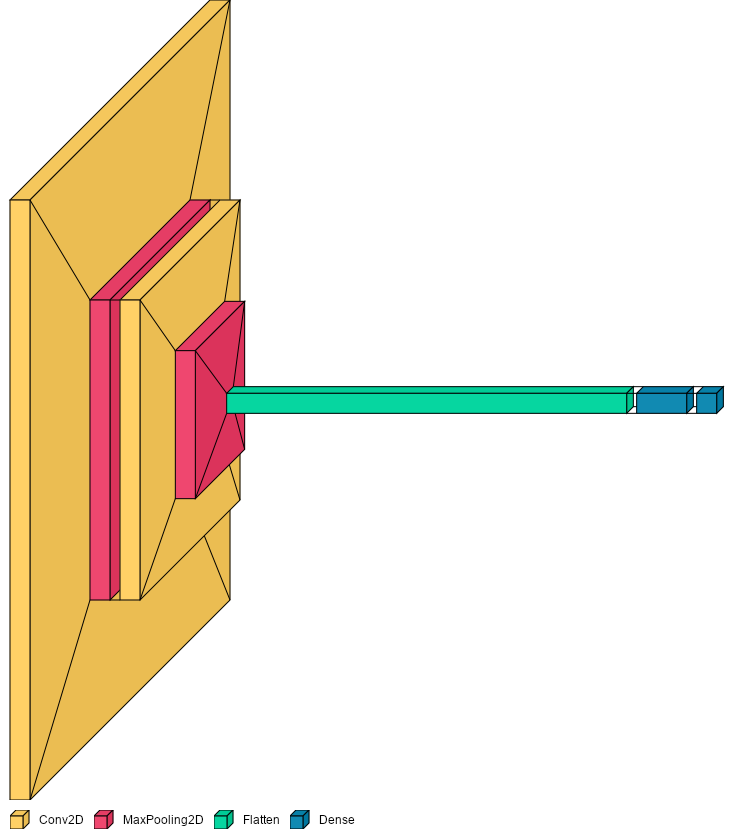

In [27]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(CNN_1, legend=True, font=font)

In [30]:
keras2ascii(CNN_1)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####    150  150    3
              Conv2D    \|/  -------------------      1216     0.0%
                relu   #####    150  150   16
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     75   75   16
              Conv2D    \|/  -------------------     12832     0.1%
                relu   #####     75   75   32
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     37   37   32
             Flatten   ||||| -------------------         0     0.0%
                       #####       43808
               Dense   XXXXX -------------------  21904500    99.9%
                relu   #####         500
               Dense   XXXXX -------------------       501     0.0%
             sigmoid   #####           1


Epoch 1/5
437/437 [==============================] - 351s 656ms/step - loss: 0.6799 - accuracy: 0.6058 - val_loss: 0.6920 - val_accuracy: 0.5306
Epoch 2/5
437/437 [==============================] - 287s 658ms/step - loss: 0.5677 - accuracy: 0.6973 - val_loss: 0.7035 - val_accuracy: 0.4694
Epoch 3/5
437/437 [==============================] - 286s 655ms/step - loss: 0.4495 - accuracy: 0.7811 - val_loss: 0.7394 - val_accuracy: 0.4694
Epoch 4/5
437/437 [==============================] - 286s 655ms/step - loss: 0.3060 - accuracy: 0.8611 - val_loss: 0.7707 - val_accuracy: 0.4694
Epoch 5/5
437/437 [==============================] - 304s 696ms/step - loss: 0.1687 - accuracy: 0.9329 - val_loss: 0.8017 - val_accuracy: 0.4694
Training: 0.5190408017179671
Vali: 0.46938775510204084


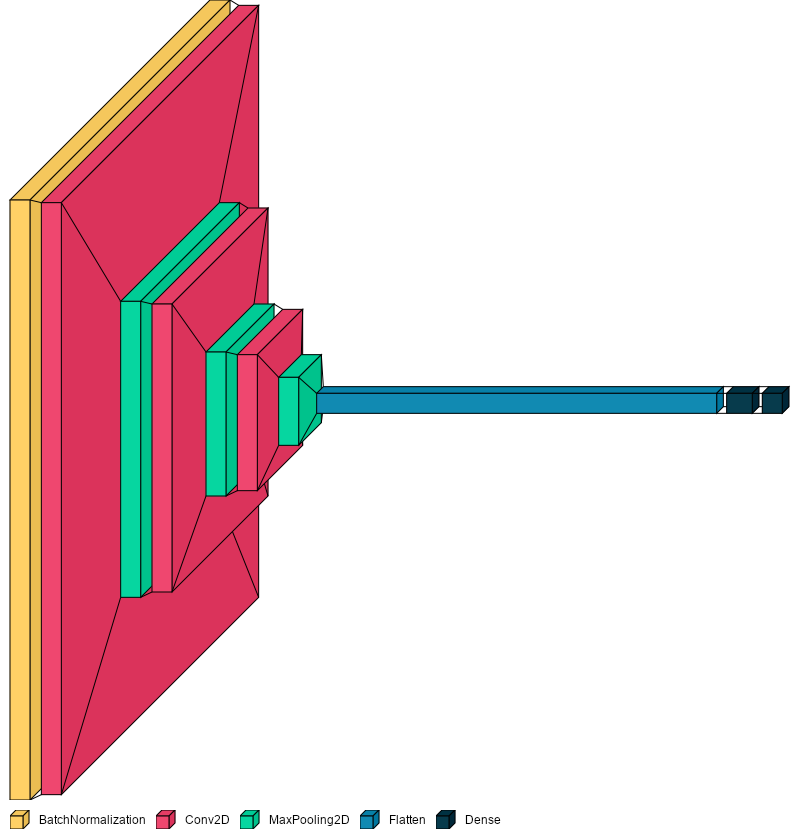

In [33]:
## Defining Cnn
CNN_2 = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
    
  layers.Dense(1, activation= 'sigmoid') #Softmax is often used as the activation for the last layer of a classification network because the result could be interpreted as a probability distribution.
])
#Computes the crossentropy loss between the labels and predictions.
#Optimizer to find best weights
CNN_2.compile(optimizer='adam', 
              # Anything between 2 and `steps_per_epoch` could help here.This step enhanced our results before acc=.82,val_acc=.79
              #steps_per_execution = 50,
              loss='binary_crossentropy', metrics=['accuracy'])
CNN_2_model = CNN_2.fit(x_train, y_train, epochs=5,validation_data=(x_val,y_val),batch_size=32)

predict_x = CNN_2.predict(x_val)
classes_x = np.argmax(predict_x, axis=1)
predict_r = CNN_2.predict(x_train)
classes_r = np.argmax(predict_r, axis=1)
print(f"Training: {accuracy_score(y_train, classes_r)}")
print(f"Vali: {accuracy_score(y_val, classes_x)}")

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(CNN_2, legend=True, font=font)

In [34]:
keras2ascii(CNN_2)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####    150  150    3
  BatchNormalization    μ|σ  -------------------        12     0.0%
                       #####    150  150    3
              Conv2D    \|/  -------------------       896     0.0%
                relu   #####    148  148   32
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     74   74   32
              Conv2D    \|/  -------------------     18496     0.2%
                relu   #####     72   72   64
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     36   36   64
              Conv2D    \|/  -------------------     73856     0.8%
                relu   #####     34   34  128
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     17   17  128
             Flatten   ||||| -------------------         0     0.0%
              

Epoch 1/5
219/219 [==============================] - 284s 1s/step - loss: 5.3163 - accuracy: 0.5619 - val_loss: 0.6954 - val_accuracy: 0.4694
Epoch 2/5
219/219 [==============================] - 262s 1s/step - loss: 0.6572 - accuracy: 0.6028 - val_loss: 0.6991 - val_accuracy: 0.4694
Epoch 3/5
219/219 [==============================] - 269s 1s/step - loss: 0.6353 - accuracy: 0.6293 - val_loss: 0.7027 - val_accuracy: 0.4694
Epoch 4/5
219/219 [==============================] - 277s 1s/step - loss: 0.6061 - accuracy: 0.6583 - val_loss: 0.7071 - val_accuracy: 0.4694
Epoch 5/5
219/219 [==============================] - 282s 1s/step - loss: 0.5639 - accuracy: 0.6989 - val_loss: 0.7116 - val_accuracy: 0.4694
Training: 0.5190408017179671
Vali: 0.46938775510204084


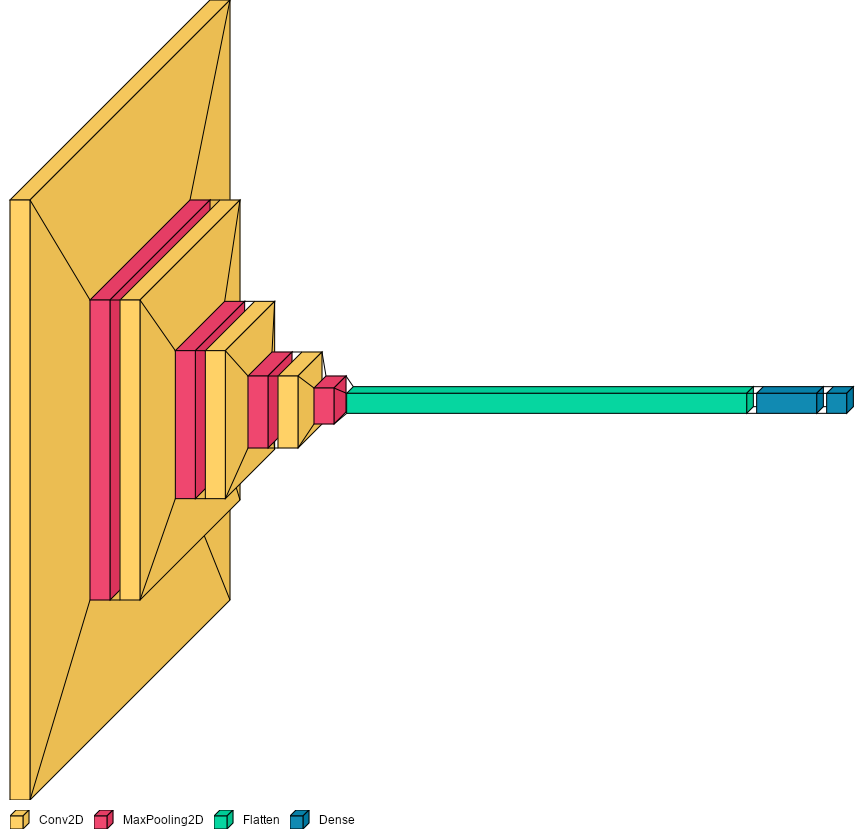

In [37]:
CNN_3 = Sequential([InputLayer(input_shape=x_train.shape[1:]),
                     Conv2D(filters=16, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Conv2D(filters=32, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Conv2D(filters=64, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Conv2D(filters=128, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Flatten(),
                     Dense(600, activation='relu'),
                     Dense(1, activation='sigmoid')])

CNN_3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
CNN_3_model = CNN_3.fit(x_train, y_train, epochs=5,validation_data=(x_val,y_val),batch_size=64)

predict_x = CNN_3.predict(x_val)
classes_x = np.argmax(predict_x, axis=1)
predict_r = CNN_3.predict(x_train)
classes_r = np.argmax(predict_r, axis=1)
print(f"Training: {accuracy_score(y_train, classes_r)}")
print(f"Vali: {accuracy_score(y_val, classes_x)}")

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(CNN_3, legend=True, font=font)

In [38]:
keras2ascii(CNN_3)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####    150  150    3
              Conv2D    \|/  -------------------      1216     0.0%
                relu   #####    150  150   16
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     75   75   16
              Conv2D    \|/  -------------------     12832     0.2%
                relu   #####     75   75   32
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     37   37   32
              Conv2D    \|/  -------------------     51264     0.8%
                relu   #####     37   37   64
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     18   18   64
              Conv2D    \|/  -------------------    204928     3.2%
                relu   #####     18   18  128
        MaxPooling2D   Y max -------------------         0     0.0%
              

- upgrade CNN

* Dropout(.05): only 5 %
* ReduceLROnPlateau
* EarlyStopping
* optimizer > Adagrad

In [39]:
CNN_4 = Sequential()

CNN_4.add(InputLayer(input_shape=x_train.shape[1:]))

CNN_4.add(Conv2D(32, 3, activation='relu'))    
CNN_4.add(MaxPooling2D())

CNN_4.add(Conv2D(64, 3, activation='relu'))   
CNN_4.add(MaxPooling2D())

CNN_4.add(Conv2D(128, 3, activation='relu'))    
CNN_4.add(MaxPooling2D())

CNN_4.add(Flatten())
CNN_4.add(Dense(512, activation='relu')) 
CNN_4.add(Dropout(.05))   # replace 0.20
CNN_4.add(Dense(1 , activation = 'sigmoid'))  

CNN_4.compile(optimizer='Adagrad',loss="binary_crossentropy",metrics=['accuracy'])
# model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

CNN_4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 17, 17, 128)     

In [40]:
callbacks=[
        keras.callbacks.EarlyStopping(patience=8, verbose=1, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(factor=.5, patience=3, verbose=1),
    ]
history_1= CNN_4.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_val,y_val), callbacks=[callbacks])

Epoch 1/5
219/219 [==============================] - 254s 1s/step - loss: 7.7270 - accuracy: 0.5418 - val_loss: 0.6937 - val_accuracy: 0.3776 - lr: 0.0010
Epoch 2/5
219/219 [==============================] - 238s 1s/step - loss: 0.6538 - accuracy: 0.6105 - val_loss: 0.6939 - val_accuracy: 0.4082 - lr: 0.0010
Epoch 3/5
219/219 [==============================] - 237s 1s/step - loss: 0.6289 - accuracy: 0.6422 - val_loss: 0.6943 - val_accuracy: 0.2653 - lr: 0.0010
Epoch 4/5
219/219 [==============================] - ETA: 0s - loss: 0.6044 - accuracy: 0.6684
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
219/219 [==============================] - 238s 1s/step - loss: 0.6044 - accuracy: 0.6684 - val_loss: 0.6945 - val_accuracy: 0.2143 - lr: 0.0010
Epoch 5/5
219/219 [==============================] - 253s 1s/step - loss: 0.5737 - accuracy: 0.7004 - val_loss: 0.6947 - val_accuracy: 0.2347 - lr: 5.0000e-04


In [47]:
CNN_5 = Sequential()

CNN_5.add(InputLayer(input_shape=x_train.shape[1:]))

CNN_5.add(Conv2D(32, 3, activation='relu'))   
CNN_5.add(MaxPooling2D())

CNN_5.add(Conv2D(64, 3, activation='relu'))   
CNN_5.add(MaxPooling2D())

CNN_5.add(Conv2D(128, 3, activation='relu'))    
CNN_5.add(MaxPooling2D())

CNN_5.add(Flatten())
CNN_5.add(Dense(128, activation='relu'))    #256-CNN_2
CNN_5.add(Dense(1, activation = 'sigmoid'))  

CNN_5.compile(optimizer='adam', 
                loss="binary_crossentropy", 
                metrics=['accuracy'])
CNN_5.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 17, 17, 128)     

Epoch 1/5
437/437 [==============================] - 287s 533ms/step - loss: 1.9931 - accuracy: 0.5512 - val_loss: 0.7194 - val_accuracy: 0.4898
Epoch 2/5
437/437 [==============================] - 236s 540ms/step - loss: 0.6742 - accuracy: 0.5801 - val_loss: 0.7211 - val_accuracy: 0.4898
Epoch 3/5
437/437 [==============================] - 227s 519ms/step - loss: 0.6408 - accuracy: 0.6228 - val_loss: 0.7135 - val_accuracy: 0.4898
Epoch 4/5
437/437 [==============================] - 232s 532ms/step - loss: 0.6103 - accuracy: 0.6582 - val_loss: 0.7536 - val_accuracy: 0.4796
Epoch 5/5
437/437 [==============================] - 231s 528ms/step - loss: 0.6156 - accuracy: 0.6583 - val_loss: 0.7556 - val_accuracy: 0.5204
Training: 0.5190408017179671
Vali: 0.46938775510204084


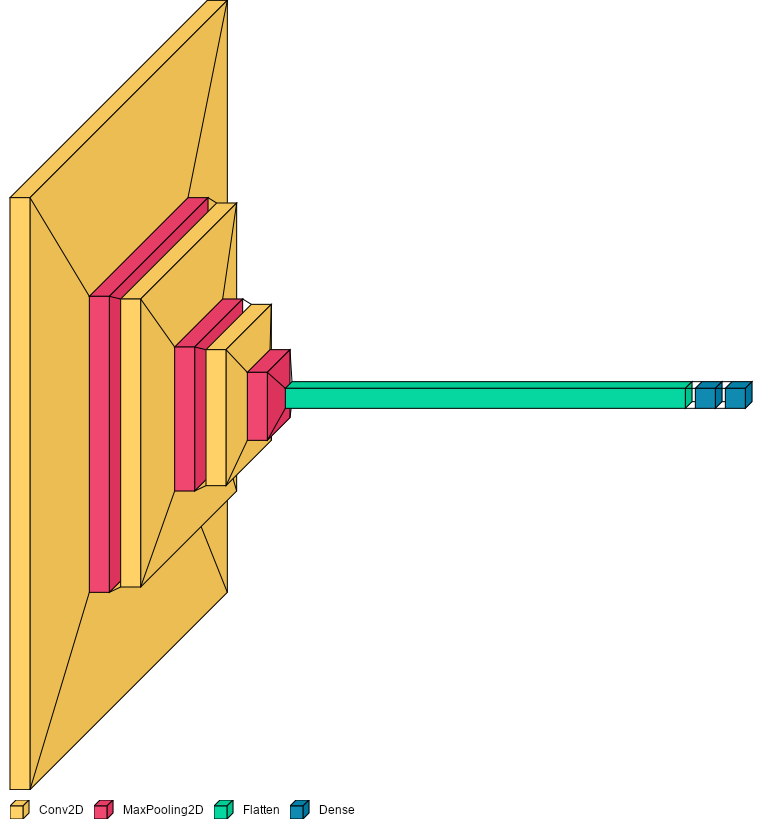

In [48]:
CNN_5_model = CNN_5.fit(x_train, y_train, epochs=5,validation_data=(x_val,y_val),batch_size=32)

predict_x = CNN_5.predict(x_val)
classes_x = np.argmax(predict_x, axis=1)
predict_r = CNN_5.predict(x_train)
classes_r = np.argmax(predict_r, axis=1)
print(f"Training: {accuracy_score(y_train, classes_r)}")
print(f"Vali: {accuracy_score(y_val, classes_x)}")

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(CNN_5, legend=True, font=font)

In [54]:
CNN_6 = Sequential()

CNN_6.add(InputLayer(input_shape=x_train.shape[1:]))

CNN_6.add(Conv2D(32, 3, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))    
CNN_6.add(MaxPooling2D())

CNN_6.add(Conv2D(64, 3, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))   
CNN_6.add(MaxPooling2D())

CNN_6.add(Conv2D(128, 3, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))    
CNN_6.add(MaxPooling2D())

CNN_6.add(Flatten())
CNN_6.add(Dense(512, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))     
CNN_6.add(Dense(1 , activation = 'sigmoid'))  

CNN_6.compile(optimizer='adam', 
                loss="binary_crossentropy", 
                metrics=['accuracy'])
CNN_6.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 17, 17, 128)    

Epoch 1/5
219/219 [==============================] - 228s 1s/step - loss: 0.2148 - accuracy: 0.9123 - val_loss: 3.4306 - val_accuracy: 0.4898
Epoch 2/5
219/219 [==============================] - 226s 1s/step - loss: 0.1561 - accuracy: 0.9392 - val_loss: 4.3517 - val_accuracy: 0.4898
Epoch 3/5
219/219 [==============================] - 219s 1s/step - loss: 0.1281 - accuracy: 0.9547 - val_loss: 3.2811 - val_accuracy: 0.4592
Epoch 4/5
219/219 [==============================] - 221s 1s/step - loss: 0.1025 - accuracy: 0.9649 - val_loss: 12.8408 - val_accuracy: 0.5204
Epoch 5/5
219/219 [==============================] - 229s 1s/step - loss: 0.0997 - accuracy: 0.9657 - val_loss: 7.7699 - val_accuracy: 0.5306
Training: 0.5190408017179671
Vali: 0.46938775510204084


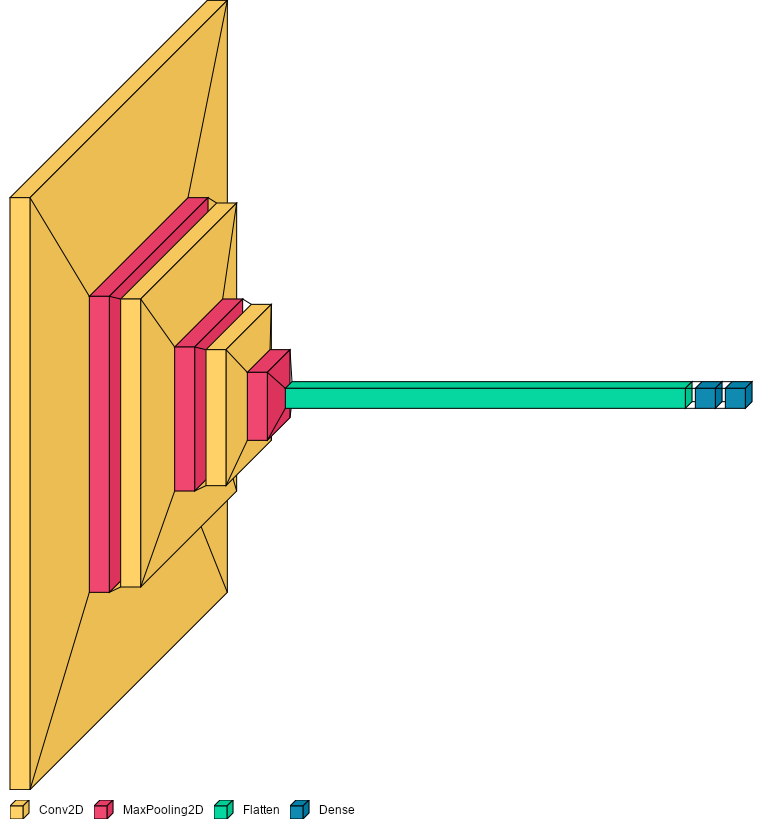

In [56]:
CNN_5_model = CNN_5.fit(x_train, y_train, epochs=5,validation_data=(x_val,y_val),batch_size=64)

predict_x = CNN_5.predict(x_val)
classes_x = np.argmax(predict_x, axis=1)
predict_r = CNN_5.predict(x_train)
classes_r = np.argmax(predict_r, axis=1)
print(f"Training: {accuracy_score(y_train, classes_r)}")
print(f"Vali: {accuracy_score(y_val, classes_x)}")

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(CNN_5, legend=True, font=font)

In [ ]:
# Graph loss, accuracy for training and validation history
acc = CNN_2_model.history['accuracy']
val_acc = CNN_2_model.history['val_accuracy']

loss = CNN_2_model.history['loss']
val_loss = CNN_2_model.history['val_loss']

epochs=5
epochs_range = range(epochs)


plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, 'b*', label='Training Accuracy') #, color = 'red')
plt.plot(epochs_range, val_acc,'g', label='Validation Accuracy')  # , color='blue')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, 'b*',label='Training Loss')
plt.plot(epochs_range, val_loss,'g', label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

# Model Transfer Learning

In [62]:
base = Xception(weights='imagenet', include_top=False, input_shape=(150,150,3))

# Freeze convolutional layers
for layer in base.layers:
    layer.trainable = False  

NN_transfer_1 = Sequential([InputLayer(input_shape=x_train.shape[1:]),
                         base,
                         Flatten(),
                         Dense(500, activation='relu'),
                         Dense(1, activation='sigmoid')])

NN_transfer_1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

NN_transfer_1_model = NN_transfer_1.fit(x_train, y_train, epochs=5, verbose=1,validation_data=(x_val,y_val),callbacks=[EarlyStopping()])

predict_x = NN_transfer_1.predict(x_val)
classes_x = np.argmax(predict_x, axis=1)
predict_r = NN_transfer_1.predict(x_train)
classes_r = np.argmax(predict_r, axis=1)
print(f"Training: {accuracy_score(y_train, classes_r)}")
print(f"Vali: {accuracy_score(y_val, classes_x)}")

Epoch 1/5
437/437 [==============================] - 504s 1s/step - loss: 5.7884 - accuracy: 0.6256 - val_loss: 0.6760 - val_accuracy: 0.5816
Epoch 2/5
437/437 [==============================] - 451s 1s/step - loss: 0.5679 - accuracy: 0.7025 - val_loss: 0.6816 - val_accuracy: 0.5612
Training: 0.5190408017179671
Vali: 0.46938775510204084


In [ ]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(NN_transfer_1, legend=True, font=font)

In [ ]:
keras2ascii(NN_transfer_1)

In [ ]:
NN_transfer_1.save("NN_transfer_Xception")

In [63]:
base = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))

# Freeze convolutional layers
for layer in base.layers:
    layer.trainable = False  

NN_transfer_2 = Sequential([InputLayer(input_shape=x_train.shape[1:]),
                         base,
                         Flatten(),
                         Dense(500, activation='relu'),
                         Dense(1, activation='sigmoid')])

NN_transfer_2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

NN_transfer_2_model = NN_transfer_2.fit(x_train, y_train, epochs=5, verbose=1, validation_data=(x_val,y_val),callbacks=[EarlyStopping()])

predict_x = NN_transfer_2.predict(x_val)
classes_x = np.argmax(predict_x, axis=1)
predict_r = NN_transfer_2.predict(x_train)
classes_r = np.argmax(predict_r, axis=1)
print(f"Training: {accuracy_score(y_train, classes_r)}")
print(f"Vali: {accuracy_score(y_val, classes_x)}")

Epoch 1/5
437/437 [==============================] - 930s 2s/step - loss: 1.0705 - accuracy: 0.7544 - val_loss: 0.7042 - val_accuracy: 0.4388
Epoch 2/5
437/437 [==============================] - 932s 2s/step - loss: 0.3009 - accuracy: 0.8698 - val_loss: 0.7201 - val_accuracy: 0.4694
Training: 0.5190408017179671
Vali: 0.46938775510204084


In [ ]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(NN_transfer_2, legend=True, font=font)

In [ ]:
keras2ascii(NN_transfer_2)

In [ ]:
NN_transfer_2.save("NN_transfer_VGG16_1")

In [64]:
base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))  

# Freeze convolutional layers
for layer in base.layers:
    layer.trainable = False  

NN_transfer_3 = Sequential(
                        [InputLayer(input_shape=x_train.shape[1:]),base,
                         Flatten(),  # should be fine , or add layers
                         Dense(64, activation='relu'),   
                         Dense(32, activation='relu'),   # 2 dense is must bcuz VGG16 model Conv2D twice and Maxpooling -> get a lot more features
                         Dense(1, activation='sigmoid')]
                       )

NN_transfer_3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'],)
NN_transfer_3.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_16 (Flatten)        (None, 8192)              0         
                                                                 
 dense_32 (Dense)            (None, 64)                524352    
                                                                 
 dense_33 (Dense)            (None, 32)                2080      
                                                                 
 dense_34 (Dense)            (None, 1)                 33        
                                                                 
Total params: 15,241,153
Trainable params: 526,465
Non-trainable params: 14,714,688
_________________________________________________________________


In [65]:
NN_transfer_3.fit(x_train, y_train, validation_data=(x_val,y_val),verbose=1,epochs=5,callbacks=[EarlyStopping()])

Epoch 1/5
437/437 [==============================] - 933s 2s/step - loss: 0.6844 - accuracy: 0.7499 - val_loss: 0.7140 - val_accuracy: 0.4592
Epoch 2/5
437/437 [==============================] - 913s 2s/step - loss: 0.3089 - accuracy: 0.8659 - val_loss: 0.7240 - val_accuracy: 0.4286


In [ ]:
NN_transfer_3.save("NN_transfer_VGG16_2")

In [66]:
base = MobileNet(weights='imagenet', include_top=False, input_shape=(150,150,3))

# Freeze convolutional layers
for layer in base.layers:
    layer.trainable = False  

NN_transfer_4 = Sequential([InputLayer(input_shape=x_train.shape[1:]),
                         base,
                         Flatten(),
                         Dense(500, activation='relu'),
                         Dense(1, activation='sigmoid')])

NN_transfer_4.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

NN_transfer_4_model = NN_transfer_4.fit(x_train, y_train, epochs=5, verbose=1, validation_data=(x_val,y_val) ,callbacks=[EarlyStopping()])

predict_x = NN_transfer_4.predict(x_val)
classes_x = np.argmax(predict_x, axis=1)
predict_r = NN_transfer_4.predict(x_train)
classes_r = np.argmax(predict_r, axis=1)
print(f"Training: {accuracy_score(y_train, classes_r)}")
print(f"Vali: {accuracy_score(y_val, classes_x)}")

17235968/17225924 [==============================] - 35s 2us/step
Epoch 1/5
437/437 [==============================] - 136s 273ms/step - loss: 0.9489 - accuracy: 0.6799 - val_loss: 5.9060 - val_accuracy: 0.4694
Epoch 2/5
437/437 [==============================] - 120s 274ms/step - loss: 0.4505 - accuracy: 0.7843 - val_loss: 3.0960 - val_accuracy: 0.4796
Training: 0.5190408017179671
Vali: 0.46938775510204084


In [ ]:
NN_transfer_4.save("NN_transfer_MobileNet")

# Model plotting in Keras

Keras also provides a function to create a plot of the network neural network graph that can make more complex models easier to understand.

The plot_model() function in Keras will create a plot of your network. This function takes a few useful arguments:

* model: (required) The model that you wish to plot.
* to_file: (required) The name of the file to which to save the plot.
* show_shapes: (optional, defaults to False) Whether or not to show the output shapes of each layer.
* show_layer_names: (optional, defaults to True) Whether or not to show the name for each layer.

Below is the updated example that plots the MyCnn model.

In [ ]:
#Model Architecture
from keras.utils.vis_utils import plot_model
plot_model(MyCnn, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
MyCnn.save('CNNmodels/cnn_v1.h5')

# Using The Best Model
* Loading the model
* Evaluating the model
* Getting predictions

In [ ]:
model = keras.models.load_model('CNNmodels/cnn_v1.h5')

In [ ]:
# Get predictions for confusion matrix
# Need to round predictions to whole numbers
# predictions = MyCnn.predict(testing_ds)
# predictions = np.round(predictions)

In [ ]:
# Function for plotting easier to read confusion matrix
# def show_cf(y_true, y_pred, class_names=None, model_name=None):
#     class_names=2
#     cf = confusion_matrix(y_true, y_pred)
#     plt.imshow(cf, cmap=plt.cm.Blues)
    
#     if model_name:
#         plt.title("Confusion Matrix: {}".format(model_name))
#     else:
#         plt.title("Confusion Matrix")
#     plt.ylabel('Actual Label')
#     plt.xlabel('Predicted Label')
    
#     class_names = set(y_true)
#     tick_marks = np.arange(class_names)
#     if class_names:
#         plt.xticks(tick_marks, class_names)
#         plt.yticks(tick_marks, class_names)
    
#     thresh = cf.max() / 2.
    
#     for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
#         plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

#     plt.colorbar()

In [ ]:
# show_cf(labels_batch,predictions)

In [ ]:
# result2_test = MyCnn.evaluate(test_generator)
# print('Test Loss:', results_test[0])
# print('Test Accuracy:', results_test[1])

In [ ]:
# Get predictions for confusion matrix
# Need to round predictions to whole numbers
# predictions1 = MyCnn.predict(test_generator)
# predictions1 = np.round(predictions1)

In [ ]:
# show_cf(test_labels,predictions1)

In [ ]:
# MyCnn.save('CnnModelsAug/cnn_v1.h5')

In [ ]:
# AccuracyVector = []
# plt.figure(figsize=(30, 30))
# for images, labels in testing_ds.take(1):
#     predictions = MyCnn.predict(images)
#     predlabel = []
#     prdlbl = []
    
#     for n in predictions:
#         predlabel.append(class_names[np.argmax(n)])
#         prdlbl.append(np.argmax(n))
    
#     AccuracyVector = np.array(prdlbl) == labels
#     for i in range(40):
#         ax = plt.subplot(10, 4, i + 1)
#         plt.imshow(images[i].numpy().astype("uint8"))
#         plt.title('Predict : '+ predlabel[i]+'   Real :'+class_names[labels[i]] )
#         plt.axis('off')
#         plt.grid(True)
